In [1]:
from urllib.request import urlretrieve
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
medical_df.age.describe()
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title="age distribution")
fig.update_layout(bargap=0.1)
fig.update_layout(width=800, height=500) 
fig.show()

In [4]:
fig_2 =px.histogram(medical_df, x='smoker', color='sex',color_discrete_sequence=['purple','grey'], title='Smoker')
fig_2.update_layout(width=800,height=500)
num_of_smokers = medical_df[medical_df['smoker']=='yes'].count()[0]
num_of_smokers
percentage = num_of_smokers/medical_df.count()[0]    #20% is tallying!!!
percentage   

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_18380\888732139.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ChinmayeeAdmin\AppData\Local\Temp\ipykernel_18380\888732139.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.20478325859491778

In [5]:
fig3 =px.histogram(medical_df,x='children',color_discrete_sequence=['purple'],title= 'Insurance Buyers across different regions',marginal='box')
# medical_df['region'].unique()
fig3.update_layout(width=800,height=500,bargap=0.1)

fig3.show()

In [6]:
fig4=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.5,title='Age VS charges',height=500,width=800)
fig4.show()

In [7]:
#to change string data to numeric ones to have a correlation
changed ={'yes':1,'no':0}
converted =medical_df.smoker.map(changed)
medical_df.charges.corr(converted)
medical_df.smoker.value_counts()


0.7872514304984778

In [8]:
# relavent_copy = medical_df.columns.drop('sex')
# df = medical_df[relavent_copy]
# df.corr()

<Axes: xlabel='age', ylabel='charges'>

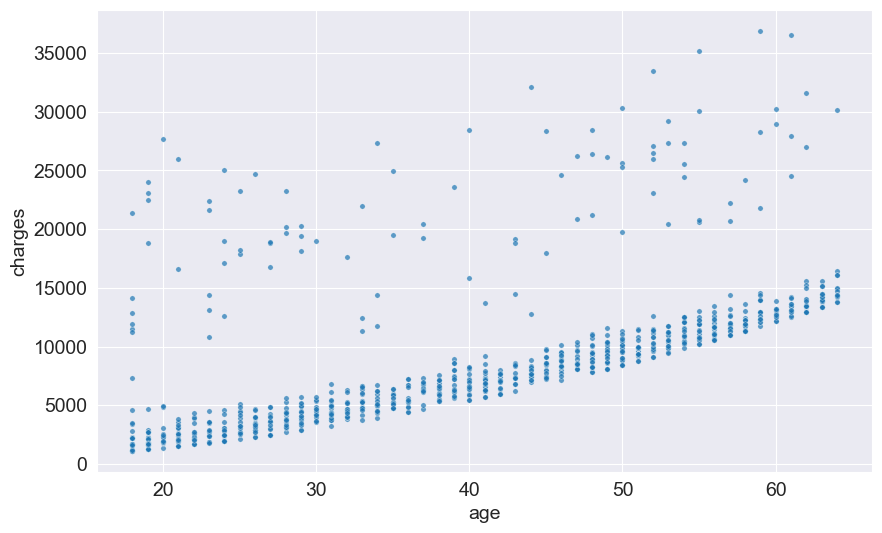

In [9]:
non_smoker_df = medical_df[medical_df.smoker=='no']
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

In [10]:
w=1000
b=-11000

def estimate_charges(age, w, b):
    return w * age + b
ages=non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1        7000
2       17000
3       22000
4       21000
5       20000
        ...  
1332    41000
1333    39000
1334     7000
1335     7000
1336    10000
Name: age, Length: 1064, dtype: int64

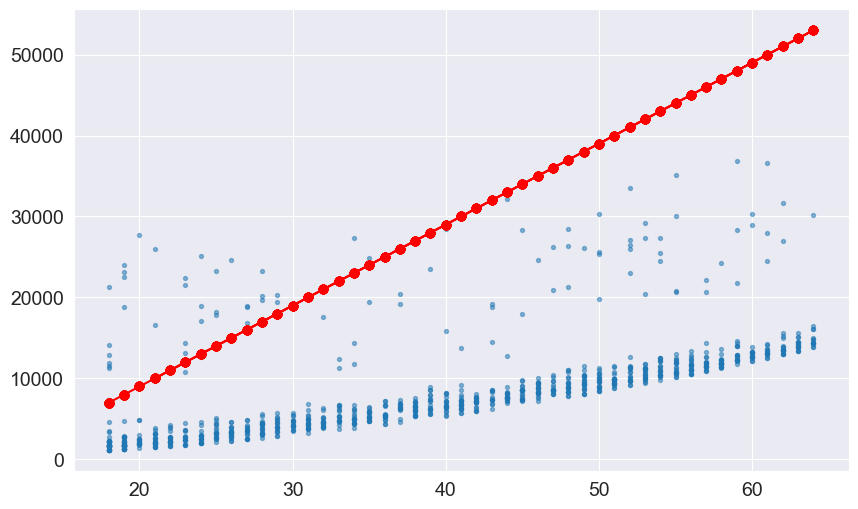

In [11]:
ages = non_smoker_df['age']
charges =non_smoker_df['charges']
plt.plot(ages,estimated_charges,'o-r')

plt.scatter(ages,charges,s=8,alpha=0.5)


In [38]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
inputs= non_smoker_df[['age']]
target=non_smoker_df.charges
model.fit(inputs,target)
model.predict(np.array([[28], 
                        [37], 
                        [61]]))

c:\Users\ChinmayeeAdmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 5391.54900271,  7796.78921819, 14210.76312614])

In [40]:
predictions = model.predict(inputs)
predictions
rmse(target,predictions)

4662.505766636395

In [41]:
inputs,targets = medical_df[['age','bmi','children']],medical_df['charges']
model= LinearRegression().fit(inputs,targets)
predicted = model.predict(inputs)
rmse(targets,predicted)

11355.317901125973

In [42]:
smokec ={'yes':1,'no':0}
medical_df['smokemod']=medical_df.smoker.map(smokec)

In [43]:
sexnocol ={'female':0,'male':1}
medical_df['sexmod']=medical_df.sex.map(sexnocol)
medical_df.charges.corr(medical_df.sexmod)
# target bla bla i get it

0.05729206220202533

In [44]:
from sklearn import preprocessing
enc= preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
arrays_made =enc.transform(medical_df[['region']]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = arrays_made
medical_df  #good job youre understanding it well!!<3

,age,sex,bmi,children,smoker,region,charges,sexmod,northeast,northwest,southeast,southwest,smokemod
0,19,female,27.900,0,yes,southwest,16884.92400,0,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0.0,1.0,0.0,0.0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0,0


In [45]:
#training model on entire things they've given
inputs,targets= medical_df[['age','bmi','children','sexmod','northeast','northwest','southeast','southwest','smokemod']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
error=model.predict(inputs)
rmse(targets,error)

6041.679651174452

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(medical_df[['age','bmi','children']])
scaler.mean_
scaler.var_
scaler_inputs=scaler.transform(medical_df[['age','bmi','children']])
scaler_inputs
medical_df

,age,sex,bmi,children,smoker,region,charges,sexmod,northeast,northwest,southeast,southwest,smokemod
0,19,female,27.900,0,yes,southwest,16884.92400,0,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0.0,1.0,0.0,0.0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0,0


In [47]:
cat_cols = ['smokemod', 'sexmod', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values  # cause the scalar inputs is returning a np array we are converting categorical data to np array using .values
inputs= np.concatenate((categorical_data,scaler_inputs),axis=1)
target=medical_df.charges
moodel=LinearRegression().fit(inputs,target)
predictions=moodel.predict(inputs)
rmse(target,predictions)

6049.618262553314